# Intro

## What is given?

Symbols
$$
S \rightarrow \text{Random Event - Person is Sick}\\
T \rightarrow \text{Random Event - Test result Positive}\\
N_s \rightarrow \text{number of people sick in a 50 000 people population}
\\
$$

What we know about the desease:

$$
P(S=1) = \frac{N_s}{50\ 000}\\
\text{where: } N_s \in [1, 2, 3, ..., 100]
$$

We know that:

$$
P(T=1\ |\ S=0) = 0.02\\
P(T=0\ |\ S=1) = 0.01
$$

## What we want to acheive?

$$
P(S = 1\ |\ T=1) = ?
$$

## How will it be acheived?

1. Using conditional probability:
$$
P(A\ |\ B) = \frac{P(A \cap B)}{P(B)}
$$
And law of total probability:
$$P(A) = \sum_n{P(A \cap B_n)} = \sum_n{P(A\ |\ B_n)P(B_n)}$$
or
$$
P(A) = P(A\ |\ B)P(B) + P(A\ |\ B')P(B')\\\ 
$$

2. Using Bayes Theorem:
$$
P(A\ |\ B) = \frac{P(B\ |\ A)P(A)}{P(B)}
$$

## Calculations

From Bayes Theorem:
$$
P\big(S=1\ \big|\ T=1\big) = \frac{P\big(T=1\ \big|\ S=1\big)\ P\big(S=1\big)}{P\big(T=1\big)}
$$
where

$
P\big(S=1\big) = \frac{N_s}{50\ 000}\ \ \ \small{\text{(}N_s\text{ is a parameter)}}\\
P\big(T=1\big) = P\big(T=1\ \big|\ S=1\big)P\big(\ S=1\big) + P\big(T=1\ \big|\ S=0\big)P\big(S=0\big)\ \ \ \tiny{\textit{from Law of total probability}}
$

where

$
P\big(T=1\ \big|\ S=0\big) = 0.02 \ \ \ \small{\text{as was given}}
$

and

$
P\big(T=1\ \big|\ S=1\big) \text{ will be calculated as:}\\
$

$
P\big(T=1\ \big|\ S=1\big) = 1 - P\big(T=0\ \big|\ S=1\big) \ \ \ \small{\text{where }P\big(T=0\ \big|\ S=1\big)\ \text{ was given as 0.01)}}\\
$

Because:

$
P\big(T=1\ \big|\ S=1\big) + P\big(T=0\ \big|\ S=1\big) = P\Big(\big(T=0 \cup T=1\big)\ \big|\ S=1\Big) = 1
$

Then

$
P\big(T=1\ \big|\ S=1\big) = \frac{\text{number of correct positive test results}}{\text{number of sick people in population}}
$

## Eureka!

# Code

In [2]:
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt

## Probabilistic functions

In [3]:
def bayes_theorem(p_b_a, p_a, p_b):
    return p_b_a * p_a / p_b

In [4]:
def law_of_total_prob(p_a_b, p_b, p_a_b_prime, p_b_prime):
    return p_a_b * p_b + p_a_b_prime * p_b_prime

In [5]:
Proba = {
         ('positive', 'healthy'): 0.02,
         ('negative', 'sick'): 0.01,
        }

## Task/Simulation Calculation

### Algorithm

In [6]:
def calculate_probabs(nb_sick, population_size, p_pos_heal=0.02, p_neg_sick=0.01):
    P = {
         ('positive', 'healthy'): p_pos_heal,
         ('negative', 'sick'): p_neg_sick,
        }
    
    P['sick'] = nb_sick / population_size
    P['healthy'] = 1 - P['sick']

    P['positive', 'sick'] = 1 - P['negative', 'sick']
    P['negative', 'healthy'] = 1 - P['positive','healthy']

    P['positive'] = law_of_total_prob(P['positive','healthy'], 
                                      P['healthy'], 
                                      P['positive', 'sick'], 
                                      P['sick'])
    
    P['sick','positive'] = bayes_theorem(P['positive','sick'], P['sick'], 
                                         P['positive'])
    
    # All the rest - for fun!
    P['healthy','positive'] = bayes_theorem(P['positive','healthy'], P['healthy'], 
                                         P['positive'])
    
    P['negative'] = law_of_total_prob(P['negative','healthy'], 
                                      P['healthy'], 
                                      P['negative', 'sick'], 
                                      P['sick'])
    
    P['sick','negative'] = bayes_theorem(P['negative','sick'], P['sick'], 
                                         P['negative'])
    P['healthy','negative'] = bayes_theorem(P['negative','healthy'], P['healthy'], 
                                            P['negative'])
    return P

### Calculation

In [11]:
pop_size = 50000
nbs_sick = np.asarray(range(0, pop_size+1))
res = np.asarray([calculate_probabs(s, pop_size)['sick','positive'] for s in nbs_sick])

### Visualisation

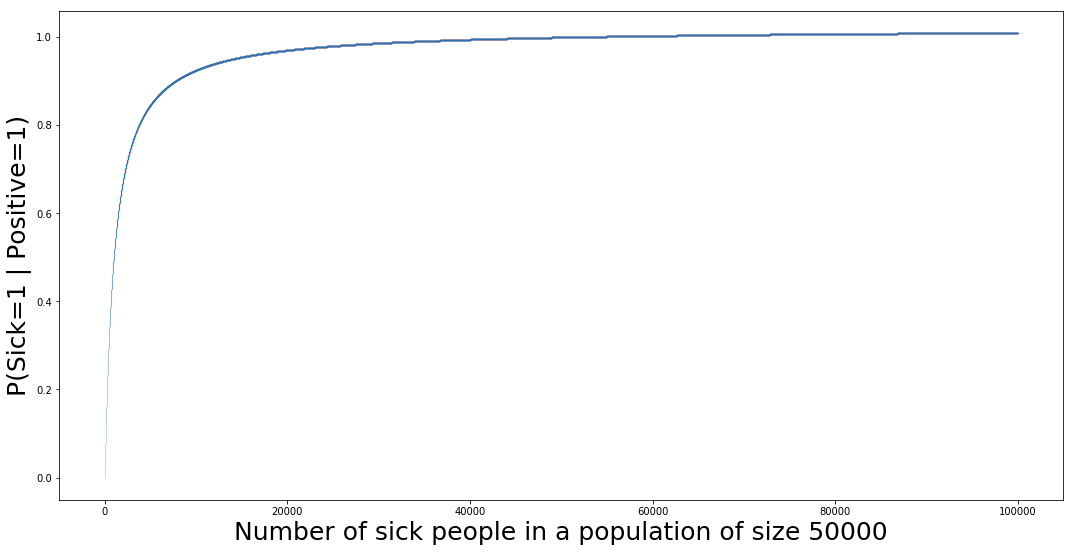

In [8]:
plt.figure(figsize=(18,9))
plt.ylabel('P(Sick=1 | Positive=1)', size=25)
plt.xlabel('Number of sick people in a population of size %d'%pop_size, 
           size=25)
plt.scatter(nbs_sick, res, s=0.001)
plt.show()

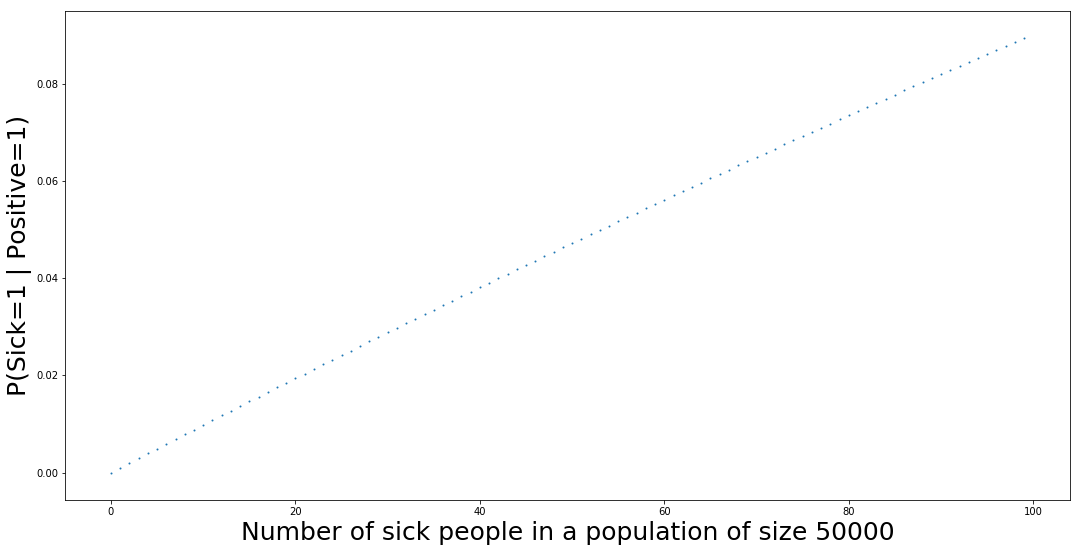

In [52]:
plt.figure(figsize=(18,9))
plt.ylabel('P(Sick=1 | Positive=1)', size=25)
plt.xlabel('Number of sick people in a population of size %d'%pop_size, 
           size=25)
plt.scatter(nbs_sick[:100], res[:100], s=1)
plt.show()

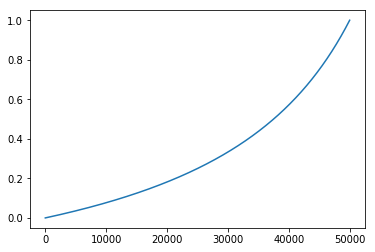

In [29]:
dta = np.asarray([ n/50000 for n in range(50000)])
a = 0.25
plt.plot(a*dta/(a*dta + (1-a)*(1-dta)))